# Assignment 1

## Importing libraries 
this library will use it to build assignment

In [ ]:
import numpy as np 
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import classification_report, accuracy_score
import timeit

library versions requrement

sklearn  1.0.2

numpy  1.21.6

pandas  1.3.5

matplotlib 3.2.2

seaborn 0.11.2

Python 3.7.13

In [ ]:
import sklearn
import matplotlib

print('library versions')
print('sklearn ',sklearn.__version__)
print('numpy ',np.__version__)
print('pandas ',pd.__version__)
print('matplotlib',matplotlib.__version__)
print('seaborn',sns.__version__)
!python --version


library versions
sklearn  1.0.2
numpy  1.21.6
pandas  1.3.5
matplotlib 3.2.2
seaborn 0.11.2
Python 3.7.13


## Problem (1)

### Part (A)

#### Loading the train and test datasets 

In [ ]:
df_train = pd.read_csv('DUMD_train.csv')
df_test = pd.read_csv('DUMD_test.csv')
df_train.head()

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,Very Low
1,0.08,0.08,0.10,0.24,0.90,High
2,0.10,0.10,0.15,0.65,0.30,Medium
3,0.08,0.08,0.08,0.98,0.24,Low
4,0.09,0.15,0.40,0.10,0.66,Medium


In [ ]:
df_test.head()

,STG,SCG,STR,LPR,PEG,UNS
0,0.420,0.290,0.140,0.03,0.68,Medium
1,0.100,0.100,0.520,0.78,0.34,Medium
2,0.510,0.255,0.550,0.17,0.64,Medium
3,0.250,0.540,0.310,0.25,0.08,Very Low
4,0.258,0.250,0.295,0.33,0.77,High


#### Converting categorical class labels 

In [ ]:
le=LabelEncoder()
le.fit(df_train.iloc[:,-1])
print(le.classes_)
df_train.iloc[:,-1]=le.transform(df_train.iloc[:,-1])
df_test.iloc[:,-1]=le.transform(df_test.iloc[:,-1])
df_train.head()

['High' 'Low' 'Medium' 'Very Low']


,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,3
1,0.08,0.08,0.10,0.24,0.90,0
2,0.10,0.10,0.15,0.65,0.30,2
3,0.08,0.08,0.08,0.98,0.24,1
4,0.09,0.15,0.40,0.10,0.66,2


In [ ]:
df_test.head()

,STG,SCG,STR,LPR,PEG,UNS
0,0.420,0.290,0.140,0.03,0.68,2
1,0.100,0.100,0.520,0.78,0.34,2
2,0.510,0.255,0.550,0.17,0.64,2
3,0.250,0.540,0.310,0.25,0.08,3
4,0.258,0.250,0.295,0.33,0.77,0


### Part (B)

#### Selecting the two features 

show correlation between all features with target and with itself be shown heatmap for correlation

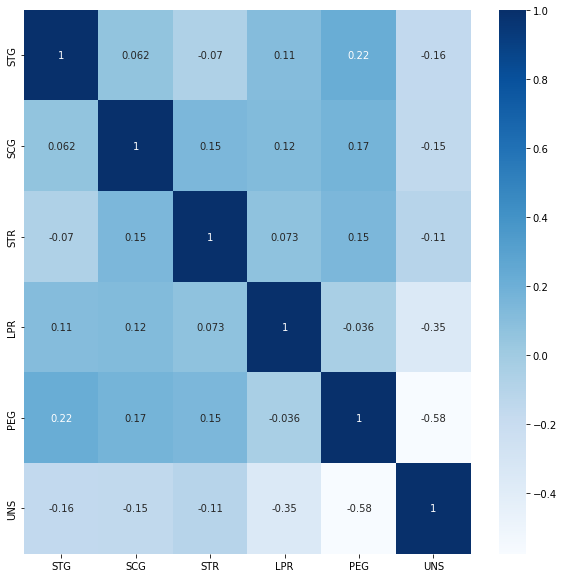

In [ ]:
corrmat = df_train.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(corrmat,annot=True,cmap="Blues")

As per shown in the heat map, the most two correlated features with the target "UNS" are"PEG" and "LPR"

Using pair plot to show data between features with respect to target featrue "UNS"

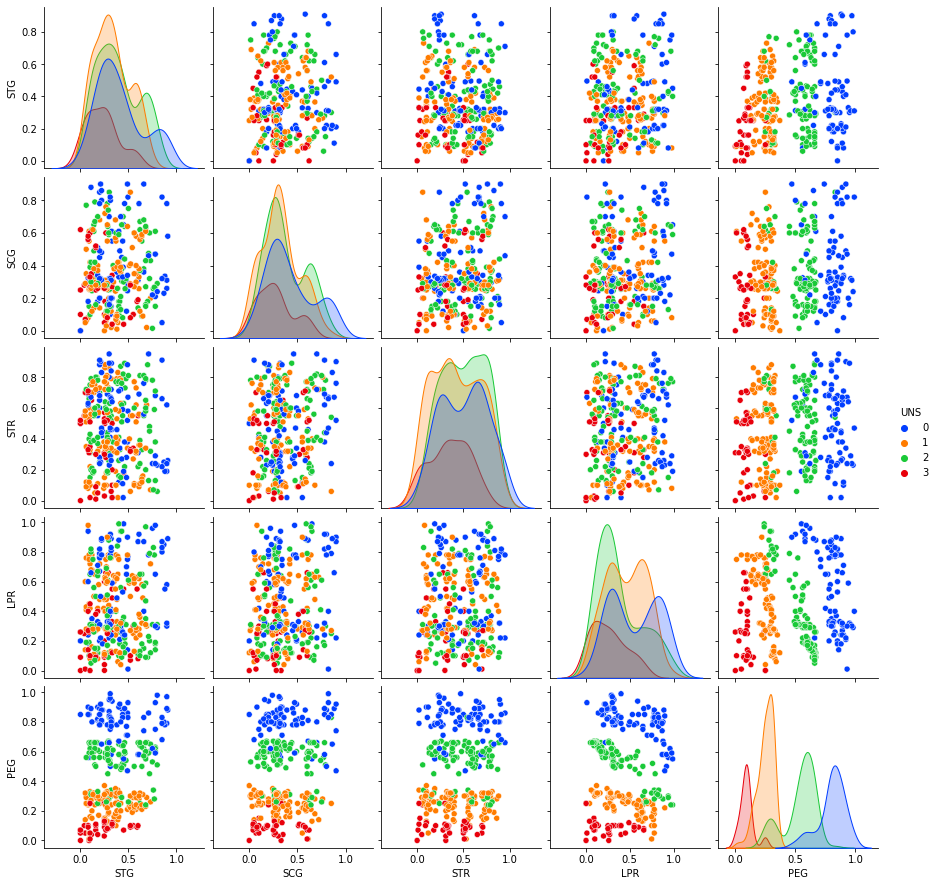

In [ ]:
sns.pairplot(df_train, hue = 'UNS', palette="bright");

Using ANOVA to double check and pick best two features

In [ ]:
# Select Features With Best ANOVA F-Values

# Create an SelectKBest object to select features with two best ANOVA F-Values
fvalue_selector = SelectKBest(f_classif, k=2)

# Apply the SelectKBest object to the features and target
x=df_train.iloc[:,:-1]
y=df_train.iloc[:,-1]
X_kbest = fvalue_selector.fit_transform(x, y)

# View results
print('Original number of features:', x.shape[1])
print('Reduced number of features:', X_kbest.shape[1])
print('The selected features are: ', fvalue_selector.get_feature_names_out())

# Training data features after selecting the two features
X_train = np.array(df_train[['LPR','PEG']])
X_test = np.array(df_test[['LPR','PEG']])
Y_train = np.array(y)
Y_test = np.array(df_test.iloc[:,-1])


Original number of features: 5
Reduced number of features: 2
The selected features are:  ['LPR' 'PEG']


#### Plotting decision boundaries functions

***plotData***

this funcition used to plot all given point in scatter plot with shown all class given you call it be following code 

```
plotData(features, labels, cls, class_names, title) 
```



> Funiction input 


*   features    
    
    Data you want plot it, can get from it be axies for ploting 
*   labels
    Targert data you want plot it, use to sperate data to classes  
*   cls
    
    classes will be plotting it 
*   clsnames  
    the names of all classes it's will plot it 
*   title

    the plot nsme it write above the plot that is option you can don't pass it and default varable is "SVM Classifier"

> Funiction output  


not return any thing just plot the data













In [ ]:
def plotData(features, labels, cls, class_names, title="SVM Classifier"):
  colors = ['r', 'b', 'g', 'y']
  markers = ['o', '*', '+', 's']
  for class_index in range(len(cls)):
    plt.scatter(features[labels == cls[class_index],0], features[labels == cls[class_index],1], c=colors[class_index], marker=markers[class_index], label=class_names[cls[class_index]])
  plt.title(title)
  plt.xlabel('LPR')
  plt.ylabel('PEG')
  plt.legend()

***plotRegions***

this funcition used to plot the decision boundary base on model given  you call it be following code 

```
plotRegions(model, X) 
```



> Funiction input 


*   model    
    
    model it already trained and you want get decision boundry to it  
*   X
    
    Features data that will plot decision boundary on it 



> Function output  
not return any thing just plot the decision boundry 













In [ ]:
def plotRegions(model, X):

  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  XX, YY = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
  
  z = model.predict(np.c_[XX.ravel(), YY.ravel()])
  ZZ = z.reshape(XX.shape)
  plt.contourf(XX, YY, ZZ, alpha=0.2)

#### Plotting the data

(-1.0, 1.99)

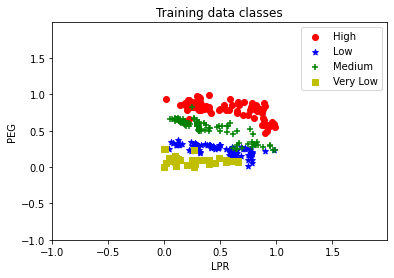

In [ ]:
cls=[0,1,2,3]
cls_names =le.inverse_transform(cls)
plotData(X_train, Y_train, cls, cls_names, "Training data classes")
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)

### Part (C)

#### Using SVM classifier

Using linear SVM model

In [ ]:
start = timeit.default_timer()

SVM_Model= SVC(kernel='linear', C=200)
SVM_Model.fit(X_train,Y_train)
stop = timeit.default_timer()

print('Time: ', stop - start)  

Time:  0.005405934000009438


Showing accuracy, confusion matrix and decision boundaries of SVM model

>>>Accuracy of training data: 

0.9597523219814241
>>>Accuracy of testing data: 

0.9875

 >>>Confusion Matrix: 



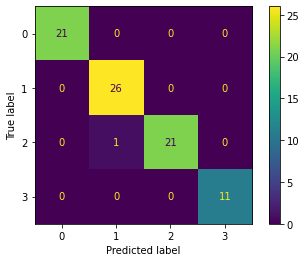

None

 >>>Decision Boundaries: 



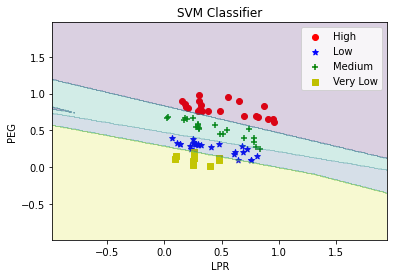

In [ ]:
print('>>>Accuracy of training data: \n')
print(SVM_Model.score(X_train,Y_train))
print('>>>Accuracy of testing data: \n')
print(SVM_Model.score(X_test,Y_test))
ConfusionMatrixDisplay.from_estimator(SVM_Model, X_test, Y_test)
print('\n >>>Confusion Matrix: \n')
print(plt.show())
print('\n >>>Decision Boundaries: \n')
cls=[0,1,2,3]
cls_names =le.inverse_transform(cls)
plotData(X_test, Y_test, cls, cls_names, "SVM Classifier")
plotRegions(SVM_Model, X_test)

#### Using perceptron

Using perceptron model

In [ ]:
percep_model = Perceptron(eta0=0.1)
percep_model.fit(X_train,Y_train)


Perceptron(eta0=0.1)

Showing accuracy, confusion matrix and decision boundaries of perceptron model

>>>Accuracy of training data: 

0.7801857585139319
>>>Accuracy of testing data: 

0.75

 >>>Confusion Matrix: 



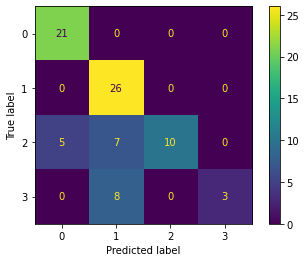

None

 >>>Decision Boundaries: 



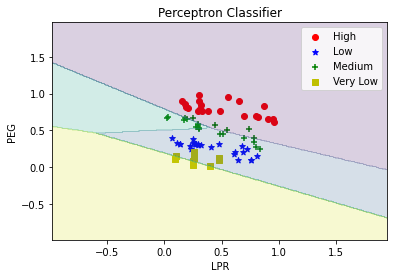

In [ ]:
print('>>>Accuracy of training data: \n')
print(percep_model.score(X_train,Y_train))
print('>>>Accuracy of testing data: \n')
print(percep_model.score(X_test,Y_test))
ConfusionMatrixDisplay.from_estimator(percep_model, X_test, Y_test)
print('\n >>>Confusion Matrix: \n')
print(plt.show())
print('\n >>>Decision Boundaries: \n')
cls=[0,1,2,3]
cls_names =le.inverse_transform(cls)
plotData(X_test, Y_test, cls, cls_names, "Perceptron Classifier")
plotRegions(percep_model, X_test)

## Problem (2)


Build OvR-SVM

### Part (A)

#### class binarized 
This class binarzes data based on one verses all or one verses one


***class binarized***


this class used to handle the convertation data to be suitable to run SVMOVR or SVMOVO 


> instance variables
*   x   
features data it will convert 
*   y  
target data it will convert 
*   le    
label encoder it used to labeled the target 
```
b=binarized(X_train,Y_train,le)
```



> instance methods
*   OVR_binarized                                            
1. Funiction input    
not give any things that depend on data that given to class in declare the class passind in constructure 
2. Funiction output                                                             
 return dictanry contien the data of each class versus rest and key contain name of class + VR can access data by this keys that return n same number of classes                                                                                   
example of code 
```
data=b.OVR_binarized()
```
*   OVO_binarized
1. Funiction input    
not give any things that depend on data that given to class in declare the class passind in constructure 
2. Funiction output                                                           
return dictanry contien the data of each class versus each class and key contain name of class1 + class2 can access data by this keys that will return n*(n-1)/2                                                                          
example of code 
```
data=b.OVO_binarized()
```
























In [ ]:
class binarized:
    def __init__(self,X,Y,le):
        self.X=np.array(X)
        self.Y=np.array(Y)
        self.le=le
        
    def OVR_binarized(self):
        data={}
        classes=set(self.Y)
        for cl in classes:
            name= self.le.inverse_transform([cl])[0]+'VR'
            y=np.array(self.Y)
            y[self.Y != cl]=0
            y[self.Y == cl]=1
            data[name]=[self.X,y]
        return data 

    def OVO_binarized(self):
        data={}
        classes=set(self.Y)
        for cl in classes:
            for cl2 in classes:
                if cl2<=cl:
                    continue
                else:
                    name=self.le.inverse_transform([cl])[0]+'V'+le.inverse_transform([cl2])[0]
                    y= np.ones(self.Y.shape)*-1
                    y[self.Y == cl]=1
                    y[self.Y == cl2]=0
                    mask=np.where((y==0) | (y==1))
                    data[name]=[self.X[mask],y[mask]]

        return data     
        

#### binarzing labels of training and testing data

In [ ]:
b_train=binarized(X_train,Y_train,le)
b_test=binarized(X_test,Y_test,le)
data_train=b_train.OVR_binarized()
data_test=b_test.OVR_binarized()
for key, value in data_train.items():
  print(key)
  print(value)


HighVR
[array([[0.   , 0.   ],
       [0.24 , 0.9  ],
       [0.65 , 0.3  ],
       [0.98 , 0.24 ],
       [0.1  , 0.66 ],
       [0.29 , 0.56 ],
       [0.72 , 0.25 ],
       [0.2  , 0.85 ],
       [0.3  , 0.81 ],
       [0.41 , 0.3  ],
       [0.3  , 0.6  ],
       [0.35 , 0.8  ],
       [0.01 , 0.05 ],
       [0.08 , 0.33 ],
       [0.27 , 0.29 ],
       [0.49 , 0.56 ],
       [0.78 , 0.2  ],
       [0.12 , 0.66 ],
       [0.29 , 0.65 ],
       [0.42 , 0.28 ],
       [0.76 , 0.25 ],
       [0.18 , 0.85 ],
       [0.25 , 0.1  ],
       [0.45 , 0.25 ],
       [0.94 , 0.56 ],
       [0.31 , 0.59 ],
       [0.65 , 0.24 ],
       [0.76 , 0.16 ],
       [0.31 , 0.78 ],
       [0.43 , 0.29 ],
       [0.72 , 0.26 ],
       [0.08 , 0.33 ],
       [0.26 , 0.   ],
       [0.2  , 0.78 ],
       [0.29 , 0.6  ],
       [0.64 , 0.25 ],
       [0.27 , 0.04 ],
       [0.14 , 0.66 ],
       [0.31 , 0.62 ],
       [0.71 , 0.9  ],
       [0.28 , 0.25 ],
       [0.78 , 0.05 ],
       [0.42 , 0.26 ],
   

#### visualAndTest function

this function used to get accuracy and plot all given point in scatter plot with desision boundry and Confusion Matrix con you call it be following code 

```
 visualAndTest(model,x,y,cl1,cl2) 
```

> Function input 
*  model         
    model it already trained and you want test it  
*   x
    features data of data you need to test it  
*   y   
    Targert data of data you need to test it
*   cl1  
    the names of class1 
*   cl2  
    the names of class2 that option in case you run OVO if not don't pass it ,the default value is null None 

> Function output  
not return any thing just plot the data













Defining "visualAndTest" for visualization and testing

In [ ]:
def visualAndTest(model,x,y,cl1,cl2=None):
    class_names=[]
    if(cl2==None):
        print("Class {} versus rest".format(cl1))
        class_names=['Rest',cl1]
    else:
        print("Class {} versus {}".format(cl1,cl2))
        class_names=[cl2,cl1]
              
    print("Number of samples:", x.shape[0])

    if(cl2==None):          
        print('Accuracy of model classify between {} and rest : {:.2f}'.format(cl1,model.score(x, y)))
    else:          
        print('Accuracy of model classify between {} and {} : {:.2f}'.format(cl1,cl2,model.score(x, y)))
        
    cls_new=[1,0]
    plotData(x, y, cls_new, class_names)
    plotRegions(model, x)
    plt.legend(loc="upper left")
    plt.show()

    print('\nConfusion Matrix:\n')
    
    ConfusionMatrixDisplay.from_estimator(model, x, y)
    plt.show()
  

#### Accuracy, confusion matrix and decision boundary using training data



run SVM on all classes versus rest and use visualAndTest to show the test of train in each case 

Class High versus rest
Number of samples: 323
Accuracy of model classify between High and rest : 0.99


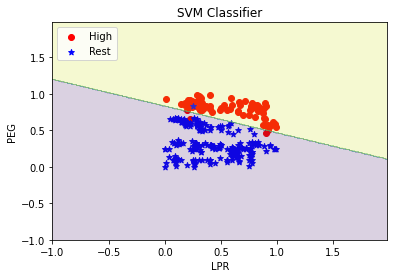


Confusion Matrix:



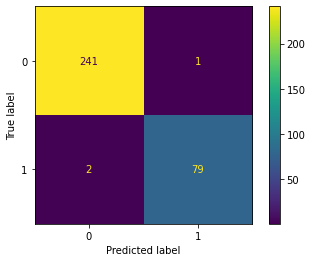

Class Low versus rest
Number of samples: 323
Accuracy of model classify between Low and rest : 0.83


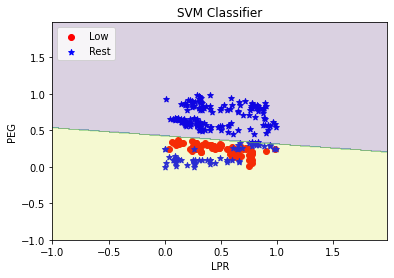


Confusion Matrix:



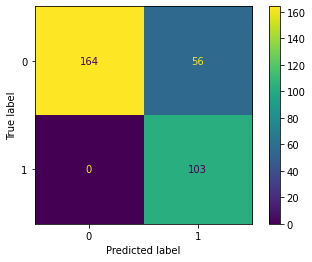

Class Medium versus rest
Number of samples: 323
Accuracy of model classify between Medium and rest : 0.69


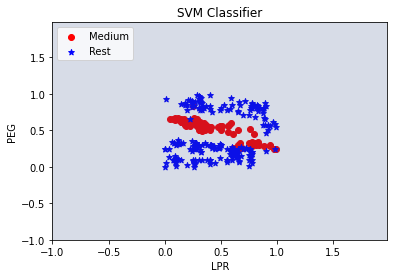


Confusion Matrix:



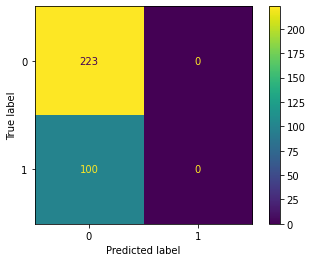

Class Very Low versus rest
Number of samples: 323
Accuracy of model classify between Very Low and rest : 0.99


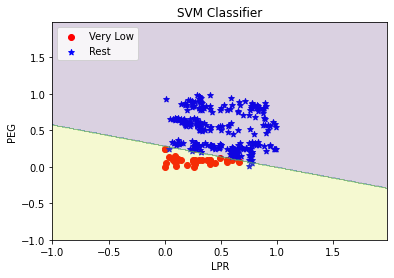


Confusion Matrix:



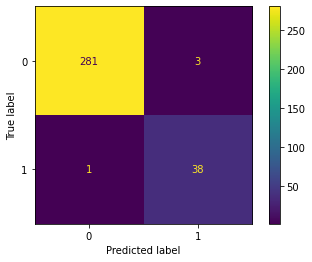


 Time:  2.4119541689997277


In [ ]:
classifers=[]
start = timeit.default_timer()


for key, value in data_train.items():
    model=SVC(kernel='linear',C=200,probability=True)
    model.fit(value[0],value[1])
    classifers.append(model)
    visualAndTest(model,value[0],value[1],key[:-2])

stop = timeit.default_timer()

print('\n Time: ', stop - start)  
    
    

#### Accuracy, confusion matrix and decision boundary using test data

run SVM on all classes versus rest and use visualAndTest to show the test of test data in each case 

Class High versus rest
Number of samples: 80
Accuracy of model classify between High and rest : 1.00


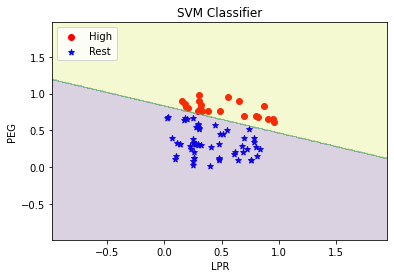


Confusion Matrix:



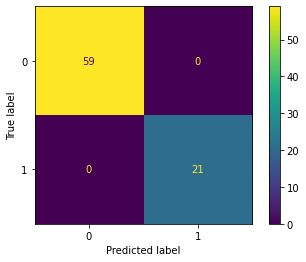

Class Low versus rest
Number of samples: 80
Accuracy of model classify between Low and rest : 0.41


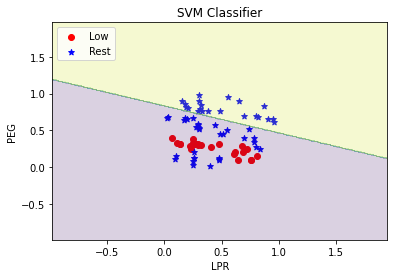


Confusion Matrix:



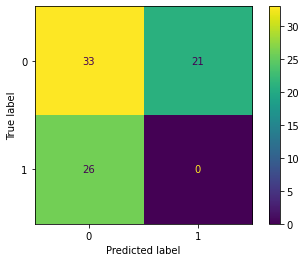

Class Medium versus rest
Number of samples: 80
Accuracy of model classify between Medium and rest : 0.46


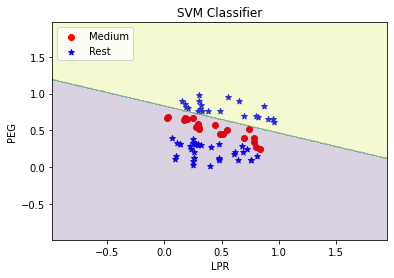


Confusion Matrix:



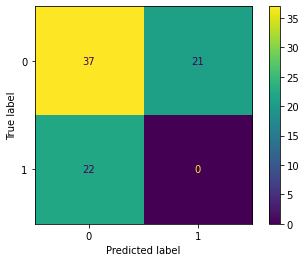

Class Very Low versus rest
Number of samples: 80
Accuracy of model classify between Very Low and rest : 0.60


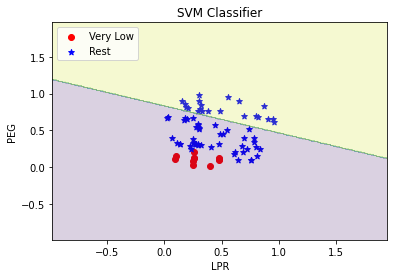


Confusion Matrix:



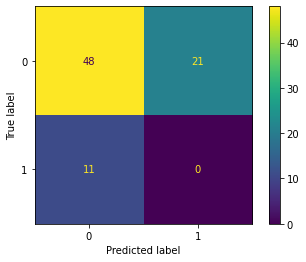


 Time:  1.4580989299997782


In [ ]:
count=0

start = timeit.default_timer()
for key, value in data_test.items():
  visualAndTest(classifers[count],value[0],value[1],key[:-2])
stop = timeit.default_timer()

print('\n Time: ', stop - start)  

### Part (B)

Reach outputs from each classifier and collect them in one list


In [ ]:
pred_ls=[]
for classifer in classifers:
    pred_ls.append(classifer.predict_proba(X_test)[:,1].reshape(-1,1))
pred_ls=np.array(pred_ls)
pred_ls= np.hstack(pred_ls)
print(pred_ls)

[[4.84715482e-02 1.35565860e-01 3.09251283e-01 1.18910007e-06]
 [1.22091339e-02 3.46437383e-01 3.13518429e-01 6.45801207e-05]
 [6.14479763e-02 1.49588734e-01 3.09861950e-01 1.16077884e-06]
 [7.23165499e-07 7.01584856e-01 3.14427341e-01 9.80925872e-01]
 [7.80691454e-01 8.06662011e-02 3.09187373e-01 1.00000010e-07]
 [9.72674682e-01 1.00306274e-01 3.11448462e-01 1.00000010e-07]
 [1.31871045e-02 2.66644712e-01 3.12033058e-01 2.78675687e-05]
 [9.36553803e-01 5.96691821e-02 3.08619956e-01 1.00000010e-07]
 [1.84479901e-04 4.57632472e-01 3.13196790e-01 1.57782764e-02]
 [1.04321750e-01 1.75077542e-01 3.10985604e-01 8.76597251e-07]
 [1.54269283e-02 2.64599283e-01 3.12075850e-01 2.30248107e-05]
 [1.90776553e-03 4.11684114e-01 3.13697235e-01 8.64823573e-04]
 [7.75643747e-01 6.94503092e-02 3.08499471e-01 1.00000010e-07]
 [1.84285194e-06 6.59580269e-01 3.14133778e-01 9.26490628e-01]
 [7.22167861e-01 8.22351870e-02 3.09102229e-01 1.00000010e-07]
 [7.53338740e-04 4.03081924e-01 3.13032431e-01 2.180518

Using argmax to aggregate confidence scores

In [ ]:
y_pred=np.argmax(pred_ls, axis=1)
print(y_pred)
print(Y_test)

[2 1 2 3 0 0 2 0 1 2 2 1 0 3 0 1 2 0 1 2 1 1 2 2 2 1 2 0 1 0 0 0 2 0 1 0 1
 3 1 1 1 0 1 2 1 0 1 0 3 1 2 0 1 0 1 3 1 1 2 0 0 1 3 2 1 1 3 3 0 1 1 1 1 2
 2 2 1 3 0 1]
[2 2 2 3 0 0 2 0 1 2 2 1 0 3 0 1 2 0 1 2 1 1 2 2 2 1 2 0 2 0 0 0 2 0 1 0 1
 3 1 1 2 0 1 2 1 0 1 0 3 1 2 0 1 0 1 3 1 1 2 0 0 1 3 2 3 3 3 3 0 1 1 1 1 2
 2 2 1 3 0 1]


Showing classification report of the model and accuracy of testing *data*

              precision    recall  f1-score   support

        High       1.00      1.00      1.00        21
         Low       0.84      1.00      0.91        26
      Medium       1.00      0.86      0.93        22
    Very Low       1.00      0.82      0.90        11

    accuracy                           0.94        80
   macro avg       0.96      0.92      0.93        80
weighted avg       0.95      0.94      0.94        80

>>>Accuracy of testing data:  0.9375 



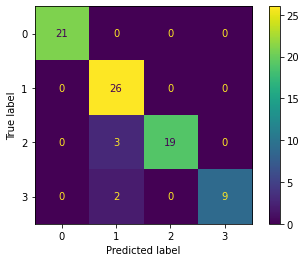

In [ ]:
print(classification_report(Y_test, y_pred, target_names=cls_names))

print('>>>Accuracy of testing data: ',accuracy_score(Y_test, y_pred),'\n')


ConfusionMatrixDisplay.from_predictions(Y_test,y_pred)


shown's the points it's uncorrect prediction be red and correct prediction be blue

(-0.99, 1.98)

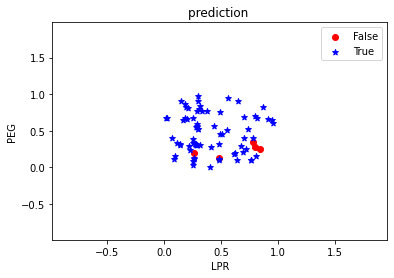

In [ ]:
label=np.array(y_pred==Y_test)*1
plotData(X_test,label,[0,1],['False','True'],'prediction ')
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)

shown's the data and decision boundry for each classoifier 

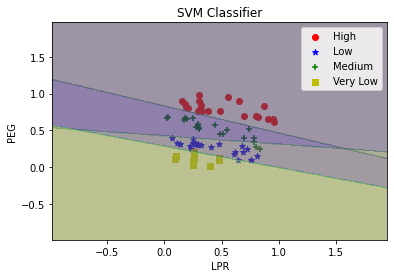

In [ ]:
plotData(X_test,Y_test,cls,cls_names)
for classifer in classifers:
  plotRegions(classifer,X_test)

## Problem (3)

### Part (A)

#### Binarized labels of OVO

In [ ]:
data_train=b_train.OVO_binarized()
data_test=b_test.OVO_binarized()
for key, value in data_train.items():
  print(key, value)

HighVLow [array([[0.24, 0.9 ],
       [0.98, 0.24],
       [0.72, 0.25],
       [0.2 , 0.85],
       [0.3 , 0.81],
       [0.41, 0.3 ],
       [0.35, 0.8 ],
       [0.08, 0.33],
       [0.27, 0.29],
       [0.78, 0.2 ],
       [0.42, 0.28],
       [0.76, 0.25],
       [0.18, 0.85],
       [0.45, 0.25],
       [0.94, 0.56],
       [0.65, 0.24],
       [0.76, 0.16],
       [0.31, 0.78],
       [0.43, 0.29],
       [0.72, 0.26],
       [0.08, 0.33],
       [0.2 , 0.78],
       [0.71, 0.9 ],
       [0.28, 0.25],
       [0.78, 0.05],
       [0.42, 0.26],
       [0.33, 0.82],
       [0.75, 0.01],
       [0.48, 0.28],
       [0.42, 0.75],
       [0.33, 0.78],
       [0.75, 0.1 ],
       [0.1 , 0.3 ],
       [0.44, 0.28],
       [0.76, 0.24],
       [0.48, 0.26],
       [0.7 , 0.25],
       [0.78, 0.18],
       [0.32, 0.8 ],
       [0.62, 0.15],
       [0.77, 0.19],
       [0.42, 0.29],
       [0.48, 0.26],
       [0.33, 0.87],
       [0.49, 0.27],
       [0.37, 0.84],
       [0.27, 0.33],
   

#### Accuracy, confusion matrix, and decision boundary using training data
run SVM on all classes versus rest and use visualAndTest to show the test of train in each case 


Class High versus Low
Number of samples: 184
Accuracy of model classify between High and Low : 1.00


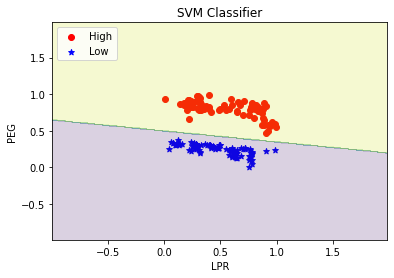


Confusion Matrix:



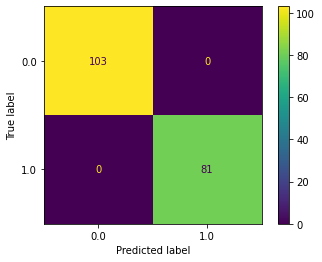

Class High versus Medium
Number of samples: 181
Accuracy of model classify between High and Medium : 0.98


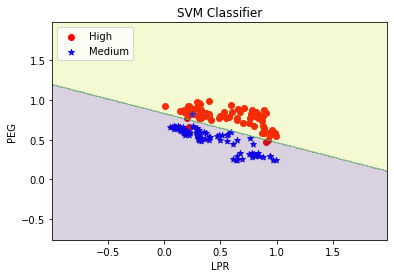


Confusion Matrix:



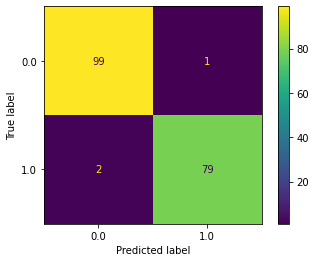

Class High versus Very Low
Number of samples: 120
Accuracy of model classify between High and Very Low : 1.00


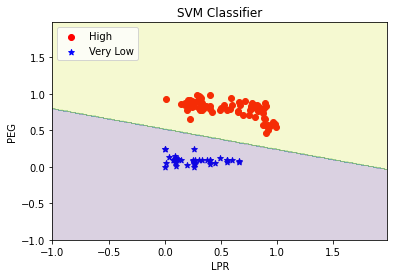


Confusion Matrix:



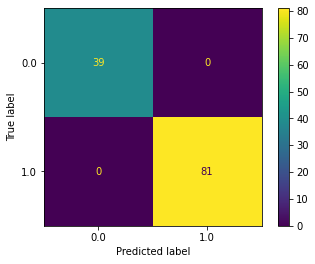

Class Low versus Medium
Number of samples: 203
Accuracy of model classify between Low and Medium : 0.97


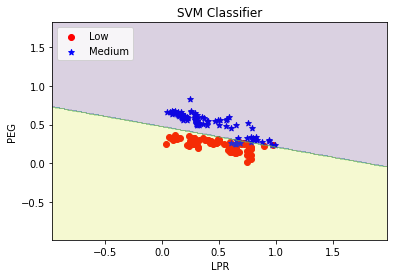


Confusion Matrix:



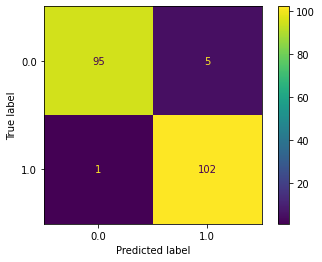

Class Low versus Very Low
Number of samples: 142
Accuracy of model classify between Low and Very Low : 0.97


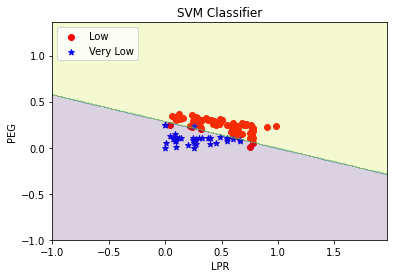


Confusion Matrix:



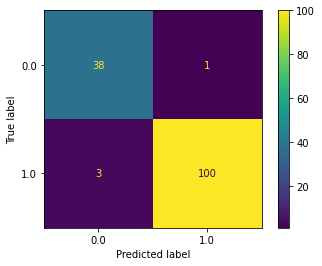

Class Medium versus Very Low
Number of samples: 139
Accuracy of model classify between Medium and Very Low : 1.00


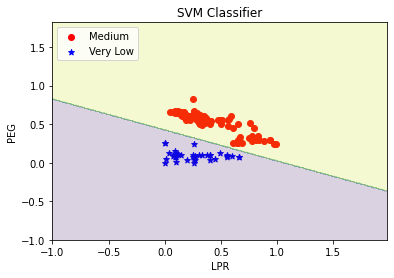


Confusion Matrix:



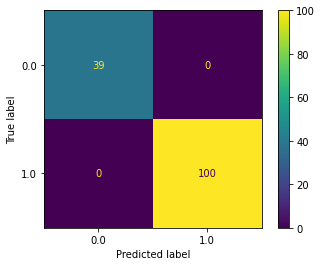


 Run Time = 2.2726242680000723


In [ ]:
classifers2={}
start = timeit.default_timer()
for key, value in data_train.items():
    model2=SVC(kernel='linear',C=200,probability=True)
    model2.fit(value[0],value[1])
    classifers2[key]=model2
    keys=key.split('V',1)
    visualAndTest(model2,value[0],value[1],keys[0],keys[1])
end= timeit.default_timer()
print('\n Run Time =',end-start)

#### Accuracy, confusion matrix, and decision boundary using testing data


run SVM on all classes versus rest and use visualAndTest to showning the test of testing data in each case 


Class High versus Low
Number of samples: 47
Accuracy of model classify between High and Low : 1.00


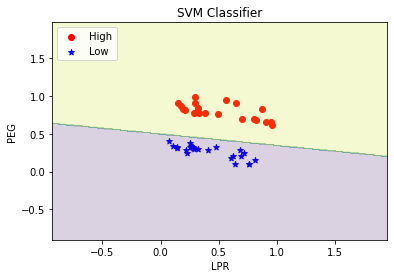


Confusion Matrix:



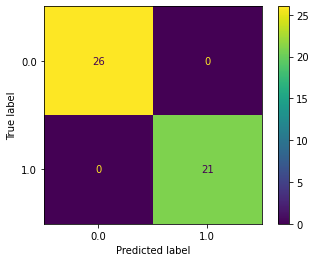

Class High versus Medium
Number of samples: 43
Accuracy of model classify between High and Medium : 1.00


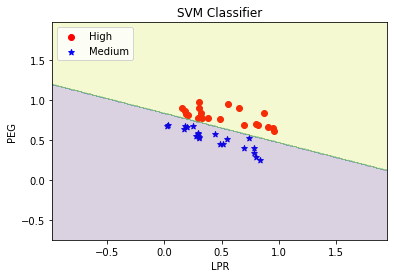


Confusion Matrix:



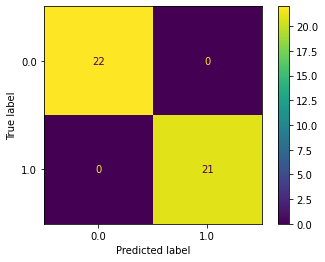

Class High versus Very Low
Number of samples: 32
Accuracy of model classify between High and Very Low : 1.00


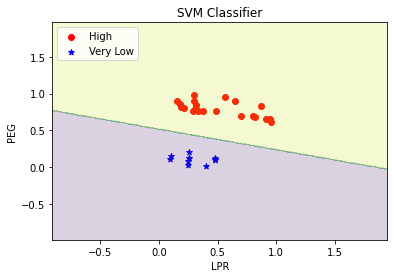


Confusion Matrix:



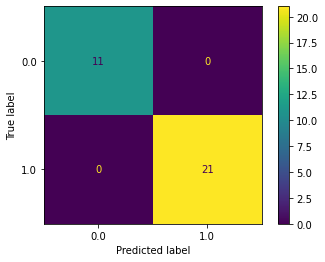

Class Low versus Medium
Number of samples: 48
Accuracy of model classify between Low and Medium : 0.98


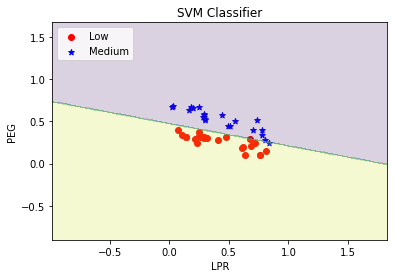


Confusion Matrix:



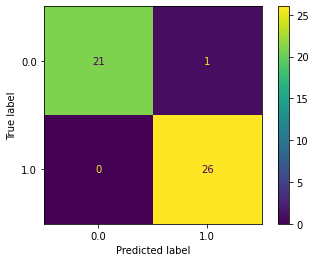

Class Low versus Very Low
Number of samples: 37
Accuracy of model classify between Low and Very Low : 1.00


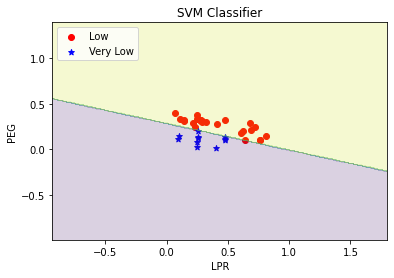


Confusion Matrix:



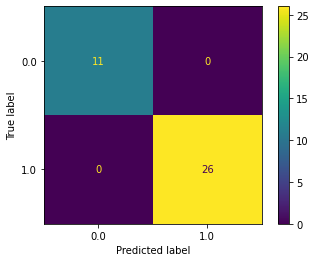

Class Medium versus Very Low
Number of samples: 33
Accuracy of model classify between Medium and Very Low : 1.00


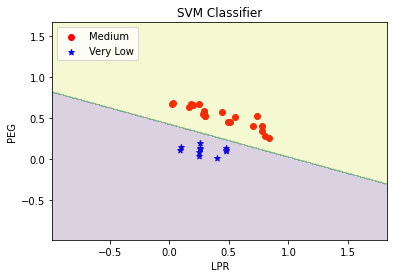


Confusion Matrix:



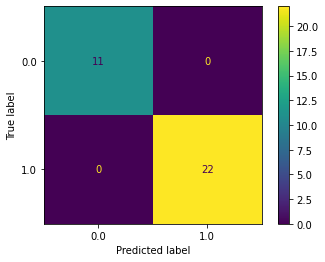


 Run Time = 6.774358296999708


In [ ]:
start = timeit.default_timer()
for key, value in data_test.items():
    keys=key.split('V',1)
    visualAndTest(classifers2[key],value[0],value[1],keys[0],keys[1])
end = timeit.default_timer()
print('\n Run Time =',end-start)

### Part (B)

Reach outputs from each classifier and collect them in one list



In [ ]:
pred_ls2={}
for key,classifer in classifers2.items():
    keys=key.split('V',1)
    if keys[0] in pred_ls2.keys():
      pred_ls2[keys[0]]+=(classifer.predict_proba(X_test)[:,1].reshape(-1,1))
    else:
      pred_ls2[keys[0]]=(classifer.predict_proba(X_test)[:,1].reshape(-1,1))
    if keys[1] in pred_ls2.keys():
      pred_ls2[keys[1]]+=(classifer.predict_proba(X_test)[:,0].reshape(-1,1))
    else:
      pred_ls2[keys[1]]=(classifer.predict_proba(X_test)[:,0].reshape(-1,1))



In [ ]:
pred=[]
for key, value in pred_ls2.items():
    pred.append(value)
pred=np.array(pred)
pred= np.hstack(pred)
print(pred)

[[1.83905501e+00 1.09610544e+00 2.95888861e+00 1.05950949e-01]
 [8.08454962e-01 1.93477831e+00 2.91921544e+00 3.37551297e-01]
 [1.81389658e+00 1.13090377e+00 2.95008049e+00 1.05119162e-01]
 [2.16324241e-02 2.00806475e+00 1.00772245e+00 2.96258037e+00]
 [2.77757667e+00 1.00859663e+00 2.19835567e+00 1.54710332e-02]
 [2.95874403e+00 1.01388361e+00 2.01880054e+00 8.57182924e-03]
 [1.08096877e+00 1.68705719e+00 2.95949376e+00 2.72480273e-01]
 [2.94414644e+00 1.00001803e+00 2.04849864e+00 7.33688818e-03]
 [2.67072135e-01 2.93847831e+00 1.59743252e+00 1.19701704e+00]
 [1.78289596e+00 1.20532371e+00 2.91681580e+00 9.49645321e-02]
 [1.10602096e+00 1.67226689e+00 2.96323793e+00 2.58474226e-01]
 [5.08942701e-01 2.48579728e+00 2.39636842e+00 6.08891598e-01]
 [2.77764484e+00 1.00506169e+00 2.20357658e+00 1.37168893e-02]
 [3.49991724e-02 2.04505075e+00 1.01804527e+00 2.90190481e+00]
 [2.71310047e+00 1.00960544e+00 2.25979199e+00 1.75020954e-02]
 [4.37750721e-01 2.68571454e+00 2.09690800e+00 7.796267

Using argmax to aggregate confidence scores

In [ ]:
y_pred2=np.argmax(pred, axis=1)
print(y_pred2)


[2 2 2 3 0 0 2 0 1 2 2 1 0 3 0 1 2 0 1 2 1 1 2 2 2 1 2 0 2 0 0 0 2 0 1 0 1
 3 1 1 1 0 1 2 1 0 1 0 3 1 2 0 1 0 1 3 1 1 2 0 0 1 3 2 1 1 3 3 0 1 1 1 1 2
 2 2 1 3 0 1]


Showing classification report of the model and accuracy of testing data

              precision    recall  f1-score   support

        High       1.00      1.00      1.00        21
         Low       0.90      1.00      0.95        26
      Medium       1.00      0.95      0.98        22
    Very Low       1.00      0.82      0.90        11

    accuracy                           0.96        80
   macro avg       0.97      0.94      0.96        80
weighted avg       0.97      0.96      0.96        80

[[21  0  0  0]
 [ 0 26  0  0]
 [ 0  1 21  0]
 [ 0  2  0  9]]
0.9625


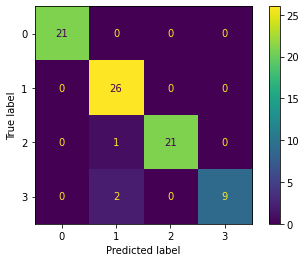

In [ ]:
print(classification_report(Y_test, y_pred2, target_names=cls_names))
print(confusion_matrix(Y_test, y_pred2))
ConfusionMatrixDisplay.from_predictions(Y_test,y_pred2)
print(accuracy_score(Y_test, y_pred2))

shown's the points it's uncorrect prediction be red and correct prediction be blue

(-0.99, 1.98)

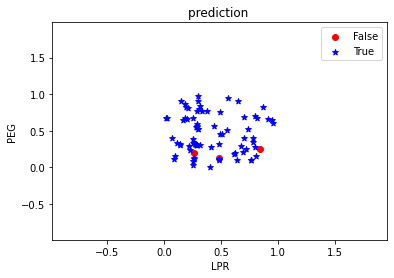

In [ ]:
label=np.array(y_pred2==Y_test)*1
plotData(X_test,label,[0,1],['False','True'],'prediction ')
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)

shown's the data and decision boundry for each classoifier 

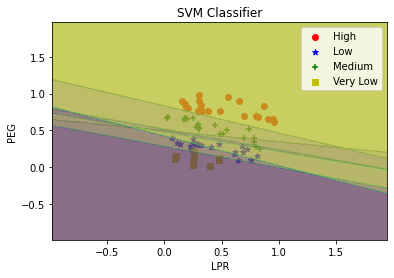

In [ ]:
plotData(X_test,Y_test,cls,cls_names)
for classifer in classifers2.values():
  plotRegions(classifer,X_test)